# Load libraries

In [2]:
import pandas as pd ## Dealing with dataframe ,excel and csv file ..
import numpy as np ##for linear algebra
import matplotlib.pyplot as plt ## ploting graph etc..
import seaborn as sns  ##same as matplotlib with extra features

In [11]:
!ls ../input

test.csv  train.csv


### Loading data

In [12]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [13]:
train.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [14]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['ID']
test_ID = test['ID']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("ID", axis = 1, inplace = True)
test.drop("ID", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (8068, 11) 
The test data size before dropping Id feature is : (2627, 10) 

The train data size after dropping Id feature is : (8068, 10) 
The test data size after dropping Id feature is : (2627, 9) 


## Features engineering

I concatenate the train and the test data into one entity to apply the transformation and clean the data on both the dataframe

In [15]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Segmentation.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Segmentation'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (10695, 9)


In [16]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(1)

,Missing Ratio
Work_Experience,10.26648


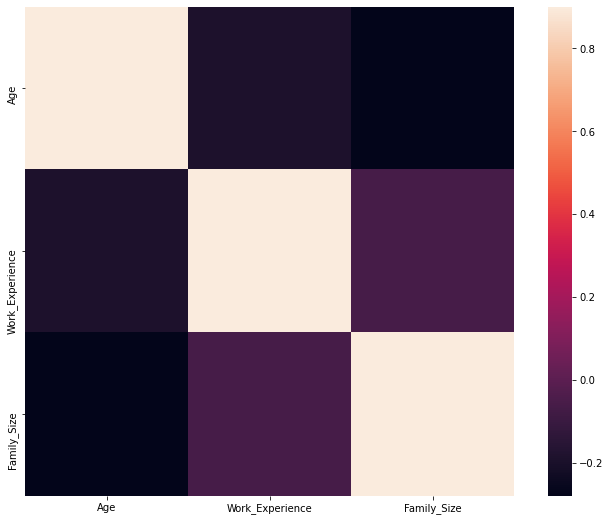

In [17]:
#Correlation map to see how features are correlated with Segmentation
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Imputing missing values


Text(0.5, 1.0, 'Percent missing data by feature')

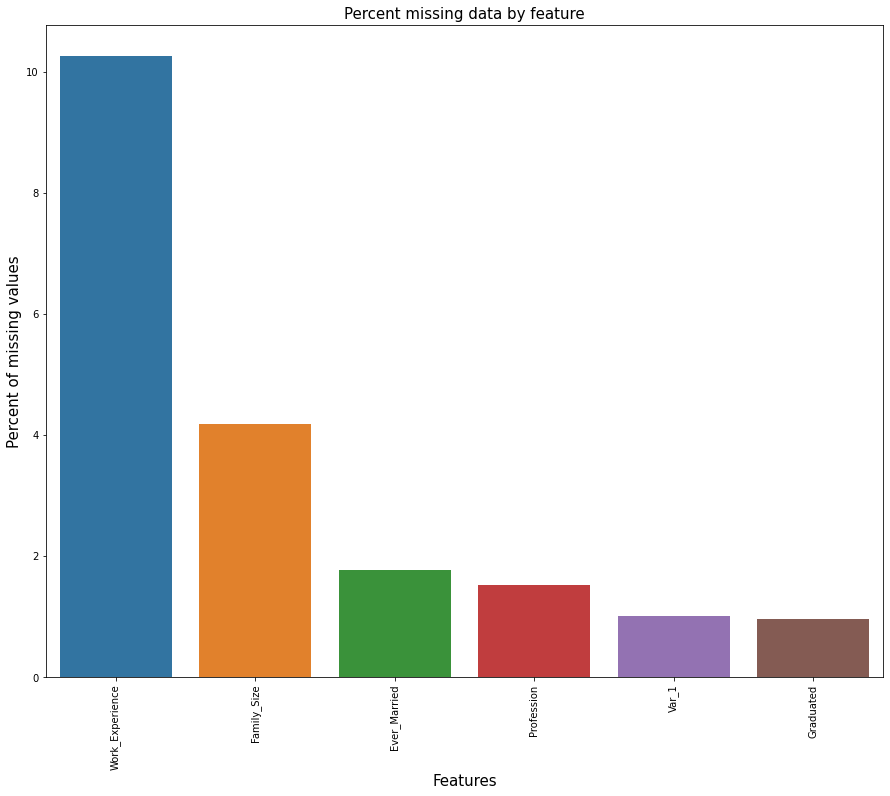

In [18]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

types of variables 
Object => categorical


float,int .. => numerical

In [19]:
all_data.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

## Family Size

In [20]:
all_data["Family_Size"] = all_data["Family_Size"].fillna(0)

## Var_1 

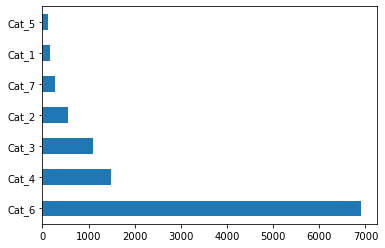

In [21]:
all_data["Var_1"].value_counts().plot(kind='barh')

In [22]:
all_data["Var_1"] = all_data["Var_1"].fillna("Cat_6")

## Profession

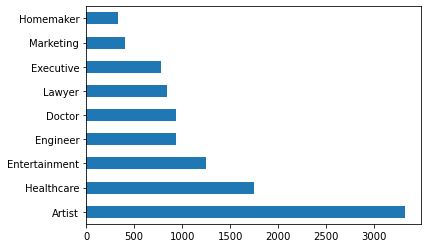

In [23]:
all_data["Profession"].value_counts().plot(kind="barh")

I suggest that NaN values on this series represents a non-worker ,I fill it with None

In [24]:
all_data["Profession"] = all_data["Profession"].fillna("Artist")

## Ever_married

Text(0.5, 1.0, 'Married or not married ?')

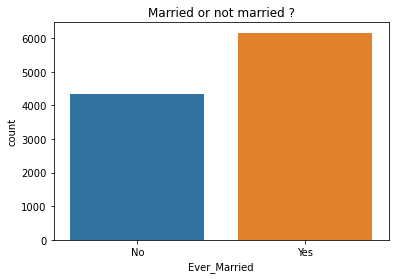

In [25]:
sns.countplot(all_data["Ever_Married"]).set_title('Married or not married ?')

In [26]:
## calculate the total number of missing value in the EVER_married variable
all_data["Ever_Married"] =all_data["Ever_Married"].fillna("Yes")

## Work Experience

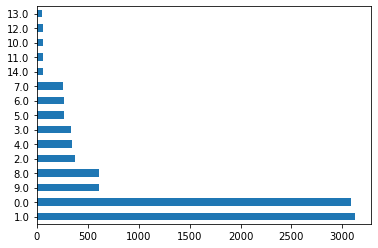

In [27]:
all_data.Work_Experience.value_counts().plot(kind="barh")

In [28]:
all_data.Work_Experience = all_data.Work_Experience.fillna(1)

## Graduated

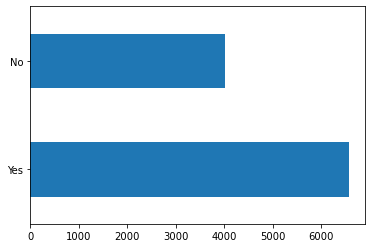

In [30]:
all_data.Graduated.value_counts().plot(kind="barh")

In [31]:
all_data.Graduated = all_data.Graduated.fillna("Yes")

## Label Encoder

In [33]:
all_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6


In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ("Gender","Ever_Married","Graduated")
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))


Shape all_data: (10695, 9)


## Kmeans to create new  clusters as variables

### Scaling numerical data

In [35]:
from sklearn.preprocessing import StandardScaler
k_mean_var = all_data[["Age","Work_Experience","Family_Size"]]
stc = StandardScaler()
k_mean_var = stc.fit_transform(k_mean_var)


In [36]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k) 
kmean_cluster = kmeans.fit_predict(k_mean_var)

In [37]:
all_data["kmean_cluster"] =kmean_cluster

In [38]:
all_data =pd.get_dummies(all_data)
print(all_data.shape)

(10695, 26)


## Split the dataset

In [39]:
train = all_data[:ntrain]
test = all_data[ntrain:]


In [40]:
train.shape

(8068, 26)

## mapping the target 

In [43]:
y_train = pd.DataFrame(y_train)
y_train.columns = ["target"]

In [44]:
quality_mapping = { "A":"3" ,
    "B": "2",
    "C": "1",
    "D": "0"}
y_train = y_train.target.map(quality_mapping)

## Modeling

In [46]:
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import sklearn


## Features Importances 

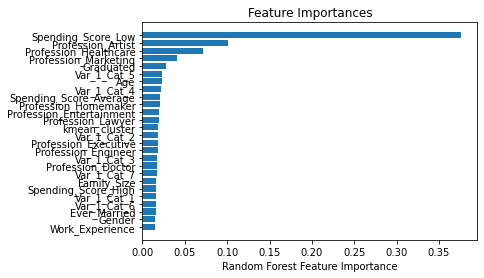

In [47]:
X = train.values
col_names = train.columns
y = y_train


model_xgb = xgb.XGBClassifier(
                             learning_rate=0.05, max_depth=30
                             )
model = model_xgb
# fit the model
model.fit(X, y)

import matplotlib.pyplot as plt
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center') 
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs]) 
plt.xlabel('Random Forest Feature Importance')
plt.show()

xgb_features_extract = []
for i in range(importances.shape[0]):
  if importances[i] > 0.05: ##tune this
    xgb_features_extract.append(col_names[i])

## Optimization using Optuna

In [48]:
## install optimizer
!pip3 install optuna

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [49]:
from sklearn import ensemble 
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVC
import numpy as np
import optuna
from functools import partial

def optimize(trial,x,y,regressor):

  if (regressor=="random_forest"):

    criterion = trial.suggest_categorical("criterion", ["entropy","gini"])
    n_estimators = trial.suggest_int("n_estimators",100,1000)
    max_depth = trial.suggest_int("max_depth",3,30)
    max_features = trial.suggest_categorical("max_features",["sqrt","auto","log2"])

    model = ensemble.RandomForestClassifier(
      criterion=criterion,
      n_estimators=n_estimators,
      max_depth=max_depth,
      max_features=max_features,
  )
  elif (regressor=="SVM"): ##SVM
    kernel = trial.suggest_categorical("kernel", ["rbf","linear","poly"])
    gamma = trial.suggest_categorical("gamma", ["scale","auto"])
    coef0 = trial.suggest_int("coef0",1,50)
    degree = trial.suggest_int("degree",1,4)


    model = SVC(
      kernel=kernel,
      gamma=gamma,
      coef0=coef0,
      degree=degree
  )
    
  else:
    max_depth = trial.suggest_int("max_depth",3,30)

    n_estimators = trial.suggest_int("n_estimators",100,3000)

    #max_leaves= trial.suggest_int("max_leaves",1,10)
  # Loguniform parameter
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.09)
  # Uniform parameter
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.0, 1.0) 


    #min_child_weight = trial.suggest_uniform('min_child_weight',1,3)

  

    model = xgb.XGBClassifier(
      objective ='reg:squarederror',
      
      n_estimators=n_estimators,
      max_depth=max_depth,
      learning_rate=learning_rate,
      colsample_bytree=colsample_bytree,
     # gamma=gamma,
     # min_child_weight=min_child_weight,
      #reg_lambda=reg_lambda,
     # max_leaves=max_leaves

  ) 

  kf=model_selection.KFold(n_splits=5)
  accuracies=[]
  for idx in kf.split(X=x , y=y):
    train_idx , test_idx= idx[0],idx[1]
    xtrain=x[train_idx]
    ytrain=y[train_idx]
    xtest=x[test_idx]
    ytest=y[test_idx]   
    model.fit(x,y)
    y_pred = model.predict(xtest)

    fold_accuracy = metrics.accuracy_score( ytest,
    y_pred )
    accuracies.append(fold_accuracy)
    # return negative accuracy
    return -1 * np.mean(accuracies)


In [50]:
	optimization_function = partial(optimize , x=train.values,y=y_train.values,regressor="random_forest")
	study = optuna.create_study(direction="minimize")
	study.optimize(optimization_function,n_trials=10)

[I 2020-08-02 19:16:32,754] Finished trial#0 with value: -0.7224287484510533 with parameters: {'criterion': 'entropy', 'n_estimators': 824, 'max_depth': 11, 'max_features': 'log2'}. Best is trial#0 with value: -0.7224287484510533.
[I 2020-08-02 19:16:36,808] Finished trial#1 with value: -0.7682775712515489 with parameters: {'criterion': 'gini', 'n_estimators': 453, 'max_depth': 12, 'max_features': 'auto'}. Best is trial#1 with value: -0.7682775712515489.
[I 2020-08-02 19:16:41,390] Finished trial#2 with value: -0.8822800495662949 with parameters: {'criterion': 'gini', 'n_estimators': 459, 'max_depth': 15, 'max_features': 'log2'}. Best is trial#2 with value: -0.8822800495662949.
[I 2020-08-02 19:16:52,736] Finished trial#3 with value: -0.9448574969021065 with parameters: {'criterion': 'gini', 'n_estimators': 902, 'max_depth': 19, 'max_features': 'auto'}. Best is trial#3 with value: -0.9448574969021065.
[I 2020-08-02 19:16:59,654] Finished trial#4 with value: -0.9510532837670385 with par

In [51]:
#	optimization_function = partial(optimize , x=train.values,y=y_train.values,regressor="xgb")
#	study = optuna.create_study(direction="minimize")
#	study.optimize(optimization_function,n_trials=10)

## Metrics function

In [52]:
#
def acc(y, y_pred):
    return sklearn.metrics.accuracy_score(y,y_pred)

## Xgboost

In [53]:
model_xgb = xgb.XGBClassifier(colsample_bytree=0.8718834395682377, 
                             learning_rate=0.0394107485633355, max_depth=30,max_leaves=4, 
                             min_child_weight=2.978747882768758, n_estimators=2000
                            )

In [54]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = model_xgb.predict(test)


In [55]:
print(acc(y_train, xgb_train_pred))

0.9499256321269212


## Gboost

In [56]:
GBoost = GradientBoostingClassifier(n_estimators=333, learning_rate=0.07177674296965386,
                                   max_depth=5,
                                   min_samples_leaf=7)


In [57]:
GBoost.fit(train, y_train)
gboost_train_pred = GBoost.predict(train)
gboost_pred = GBoost.predict(test)
print(acc(y_train, gboost_train_pred))

0.7238472979672781


## Random forest

In [58]:
#'criterion': 'entropy', 'n_estimators': 190, 'max_depth': 21, 'max_features': 'sqrt'
rf = RandomForestClassifier(n_estimators=500,max_depth=20,max_features='sqrt',criterion="entropy")

In [59]:
rf.fit(train.values,y_train)
rf_train_pred = rf.predict(train)
rf_pred = rf.predict(test)
print(acc(y_train, rf_train_pred))

0.9457114526524542


## ExtraTreeClassifier

In [60]:
etc = ensemble.ExtraTreesClassifier(max_depth=20,n_estimators=1000,min_samples_split=3)
etc.fit(train.values,y_train)
etc_train_pred = etc.predict(train)
etc_pred = etc.predict(test)
print(acc(y_train, etc_train_pred))

0.93728309370352


## Predictions

In [61]:
def max_voting(preds):
  idxs=np.argmax(preds,axis=1)
  return np.take_along_axis(preds,idxs[:,None],axis=1)

## Max votings of the 4 predictions

In [71]:
pred_voting_test = [xgb_pred,rf_pred,gboost_pred,etc_pred,etc_pred]
pred_voting_train = [xgb_train_pred,rf_train_pred,gboost_train_pred,etc_train_pred]

In [72]:
numpy_array = np.array(pred_voting_train)
transpose = numpy_array.T
pred_voting_train_t = transpose.tolist()

numpy_array = np.array(pred_voting_test)
transpose = numpy_array.T
pred_voting_test_t = transpose.tolist()

print(pred_voting_test_t)

[['2', '2', '2', '3', '3'], ['1', '1', '1', '1', '1'], ['1', '3', '1', '3', '3'], ['1', '1', '1', '1', '1'], ['0', '0', '0', '0', '0'], ['1', '1', '1', '1', '1'], ['2', '3', '2', '3', '3'], ['1', '1', '1', '1', '1'], ['1', '1', '1', '1', '1'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['1', '1', '1', '1', '1'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['1', '1', '2', '1', '1'], ['3', '3', '3', '3', '3'], ['2', '2', '1', '1', '1'], ['2', '3', '2', '2', '2'], ['1', '1', '1', '1', '1'], ['1', '1', '1', '1', '1'], ['0', '0', '3', '0', '0'], ['3', '3', '3', '3', '3'], ['2', '2', '2', '2', '2'], ['3', '3', '0', '3', '3'], ['0', '0', '0', '0', '0'], ['2', '0', '0', '0', '0'], ['1', '1', '1', '1', '1'], ['3', '3', '3', '3', '3'], ['3', '3', '3', '3', '3'], ['2', '2', '2', '2', '2'], ['1', '1', '1', '1', '1'], ['3', '3', '3', '3', '3'], ['2', '1', '1', '2', '2'], ['1', '1', '1', '1', '1'], ['2', '2', '2', '2', '2'], ['1', '2', '2', '2', '2'], 

In [73]:
pred_voting_test_t = np.array(pred_voting_test_t)

pred_voting_train_t = np.array(pred_voting_train_t)

In [74]:
voting_pred_train = max_voting(pred_voting_train_t)
voting_pred_train = np.concatenate( voting_pred_train, axis=0 )

In [75]:
voting_pred_test = max_voting(pred_voting_test_t)
voting_pred_test = np.concatenate( voting_pred_test, axis=0 )

### Accuracy of the 4 classifiers votes

In [76]:
acc(voting_pred_train,y_train)

0.8538671294000991

### Final submission

In [77]:
sub = pd.DataFrame()
sub['ID'] = test_ID
sub['Segmentation'] = voting_pred_test


In [78]:
test_mapping = { "3":"A" ,
    "2": "B",
    "1": "C",
    "0": "D"}
 

In [79]:
sub["Segmentation"] = sub["Segmentation"].astype("str")
sub["Segmentation"] =sub["Segmentation"].map(test_mapping)
sub.to_csv('submission.csv',index=False)